## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

In [ ]:
explore = pd.read_csv("HomeCredit_columns_description.csv", encoding='latin1')

In [ ]:
apl_train = pd.read_csv("application_train.csv")

In [ ]:
apl_test = pd.read_csv("application_test.csv")

In [ ]:
bur_bal = pd.read_csv("bureau_balance.csv")

In [ ]:
inst = pd.read_csv("installments_payments.csv")


In [ ]:
prev = pd.read_csv("previous_application.csv")

In [ ]:
pos = pd.read_csv("POS_CASH_balance.csv")

In [ ]:
bur = pd.read_csv("bureau.csv")

In [ ]:
credit = pd.read_csv("credit_card_balance.csv")

In [ ]:
apl_train['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


In [ ]:
print(apl_train.shape)
print(bur_bal.shape)
print(inst.shape)
print(prev.shape)
print(pos.shape)
print(bur.shape)
print(credit.shape)

(307511, 122)
(27299925, 3)
(13605401, 8)
(1670214, 37)
(10001358, 8)
(1716428, 17)
(3840312, 23)


In [ ]:
apl_test.shape

(48744, 121)

In [ ]:
apl_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
apl_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [ ]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
inst.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
credit.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# Statistical Analysis

Create Categorical values list

In [ ]:
def return_cat(*args):
    cat_vals = []
    for df in args:
        # Select columns with 'object' dtype, which typically indicates categorical data
        cat_cols = df.select_dtypes(include="object").columns
        # Convert column names to a list and add to the results
        cat_vals.append(cat_cols.tolist())
    return cat_vals

In [ ]:
cat_columns = [item for sublist in vat_vals for item in sublist]

In [ ]:
cat_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_STATUS',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_TYPE',
 'STATUS',
 'NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIE

In [ ]:
def perform_statistical_analysis(df):
    # Initialize a list to collect summary statistics
    summary_rows = []

    # Loop through each column in the DataFrame
    for column in df.columns:
        # Check if the column is numerical
        if df[column].dtype in [int, float]:
            # Compute descriptive statistics
            stats = df[column].describe()
            # Convert Series to a dictionary and add the column name
            stats_dict = stats.to_dict()
            stats_dict['Column'] = column
            # Calculate and add the number of missing values
            stats_dict['missing_count'] = df[column].isnull().sum()
            # Calculate and add the percentage of missing values
            stats_dict['% of missing'] = (stats_dict['missing_count'] / len(df)) * 100
            # Add the number of unique values
            stats_dict['unique_count'] = df[column].nunique()

            # Add the dictionary to the list of rows
            summary_rows.append(stats_dict)

    # Convert the list of dictionaries to a DataFrame
    summary_df = pd.DataFrame(summary_rows)

    # Reorder columns to have 'Column' first
    columns_order = ['Column', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing_count', '% of missing', 'unique_count']
    summary_df = summary_df[columns_order]

    # Transpose the DataFrame for better readability
    summary_df = summary_df.set_index('Column').transpose()

    # Display the summary DataFrame
    display(summary_df)

In [ ]:
perform_statistical_analysis(apl_train)

Column,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087

In [ ]:
perform_statistical_analysis(apl_test)

Column,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.7

In [ ]:
perform_statistical_analysis(bur)

Column,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,444381.000000,4.443810e+05,444381.000000,444381.000000,416780.000000,280026.000000,1.502270e+05,444380.000000,4.443780e+05,3.775960e+05,2.892260e+05,4.443800e+05,444380.000000,1.380970e+05
mean,278007.849838,5.859390e+06,-1137.619441,0.766635,526.656939,-1010.286631,3.507511e+03,0.006197,3.560727e+05,1.391675e+05,6.172402e+03,3.285767e+01,-586.894763,1.395465e+04
std,103051.890601,5.110253e+05,791.881136,34.903918,5005.872132,714.311570,6.181872e+04,0.093284,9.213278e+05,6.528631e+05,4.435762e+04,5.217361e+03,725.516212,9.791555e+04
min,100001.000000,5.000002e+06,-2922.000000,0.000000,-41879.000000,-42023.000000,0.000000e+00,0.000000,0.000000e+00,-4.705600e+06,-3.991669e+05,0.000000e+00,-41934.000000,0.000000e+00
25%,188232.000000,5.508927e+06,-1658.000000,0.000000,-1124.000000,-1477.000000,0.000000e+00,0.000000,5.236522e+04,0.000000e+00,0.000000e+00,0.000000e+00,-905.000000,0.000000e+00
50%,278238.000000,5.843863e+06,-983.000000,0.000000,-319.000000,-889.000000,0.000000e+00,0.000000,1.278585e+05,0.000000e+00,0.000000e+00,0.000000e+00,-382.000000,0.000000e+00
75%,367257.000000,6.313412e+06,-473.000000,0.000000,488.000000,-420.000000,0.000000e+00,0.000000,3.150000e+05,4.313250e+04,0.000000e+00,0.000000e+00,-32.000000,1.331550e+04
max,456253.000000,6.837603e+06,0.000000,2765.000000,31198.000000,0.000000,1.124604e+07,5.000000,1.035000e+08,4.740686e+07,4.705600e+06,2.387232e+06,20.000000,1.041493e+07
missing_count,0.000000,0.000000e+00,0.000000,0.000000,27601.000000,164355.000000,2.941540e+05,1.000000,3.000000e+00,6.678500e+04,1.551550e+05,1.000000e+00,1.000000,3.062840e+05
% of missing,0.000000,0.000000e+00,0.000000,0.000000,6.211112,36.985155,6.619410e+01,0.000225,6.750964e-04,1.502877e+01,3.491486e+01,2.250321e-04,0.000225,6.892374e+01


In [ ]:
perform_statistical_analysis(bur_bal)

Column,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00
missing_count,0.000000e+00,0.000000e+00
% of missing,0.000000e+00,0.000000e+00


In [ ]:
perform_statistical_analysis(pos)

Column,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,6.167082e+06,6.167082e+06,6.167081e+06,6.156603e+06,6.156614e+06,6.167081e+06,6.167081e+06
mean,1.903952e+06,2.784550e+05,-3.419445e+01,1.852043e+01,1.213563e+01,5.171965e-01,7.854786e-02
std,5.356449e+05,1.027441e+05,2.592155e+01,1.331323e+01,1.226987e+01,1.793822e+01,2.556889e+00
min,1.000001e+06,2.833000e+03,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434831e+06,1.895820e+05,-5.000000e+01,1.000000e+01,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897643e+06,2.786960e+05,-2.600000e+01,1.200000e+01,8.000000e+00,0.000000e+00,0.000000e+00
75%,2.369316e+06,3.674820e+05,-1.400000e+01,2.400000e+01,1.700000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,3.037000e+03,2.303000e+03
missing_count,0.000000e+00,0.000000e+00,1.000000e+00,1.047900e+04,1.046800e+04,1.000000e+00,1.000000e+00
% of missing,0.000000e+00,0.000000e+00,1.621512e-05,1.699183e-01,1.697399e-01,1.621512e-05,1.621512e-05


In [ ]:
perform_statistical_analysis(credit)

Column,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,2.244771e+06,2.244771e+06,2.244771e+06,2.244771e+06,2.244771e+06,1.789688e+06,2.244771e+06,1.789688e+06,1.789688e+06,2.078910e+06,1.782129e+06,2.244771e+06,2.244771e+06,2.244771e+06,2.244771e+06,1.789688e+06,2.244771e+06,1.789688e+06,1.789687e+06,2.078909e+06,2.244770e+06,2.244770e+06
mean,1.904469e+06,2.783266e+05,-3.363614e+01,5.716869e+04,1.521852e+05,5.797588e+03,7.096368e+03,2.806095e+02,2.804853e+03,3.479129e+03,1.015057e+04,7.445612e+03,5.487453e+04,5.697046e+04,5.698068e+04,3.040938e-01,6.720971e-01,4.861741e-03,5.340431e-01,2.064737e+01,9.243163e+00,3.614001e-01
std,5.366354e+05,1.026994e+05,2.733836e+01,1.041026e+05,1.640805e+05,2.754542e+04,3.272127e+04,7.888326e+03,2.006800e+04,5.508101e+03,3.577008e+04,3.161325e+04,1.004008e+05,1.037741e+05,1.037811e+05,1.080313e+00,3.095982e+00,8.227497e-02,3.160131e+00,2.034211e+01,9.883905e+01,2.300146e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-1.687500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.431754e+06,1.895640e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.456200e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897339e+06,2.784610e+05,-2.600000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.742030e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369523e+06,3.675720e+05,-9.000000e+00,8.797601e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e+03,9.000000e+03,6.750000e+03,8.434615e+04,8.784666e+04,8.786644e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.302750e+06,2.239274e+06,1.941983e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,4.400000e+01,1.650000e+02,1.000000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03
missing_count,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.550830e+05,0.000000e+00,4.550830e+05,4.550830e+05,1.658610e+05,4.626420e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.550830e+05,0.000000e+00,4.550830e+05,4.550840e+05,1.658620e+05,1.000000e+00,1.000000e+00
% of missing,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.027303e+01,0.000000e+00,2.027303e+01,2.027303e+01,7.388772e+00,2.060976e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.027303e+01,0.000000e+00,2.027303e+01,2.027307e+01,7.388816e+00,4.454797e-05,4.454797e-05


In [ ]:
perform_statistical_analysis(inst)

Column,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,4.478517e+06,4.478517e+06,4.478517e+06,4.478516e+06,4.478516e+06,4.477756e+06,4.478516e+06,4.477756e+06
mean,1.901321e+06,1.652707e+05,8.555372e-01,1.889709e+01,-1.044201e+03,-1.053052e+03,1.706318e+04,1.723680e+04
std,5.361945e+05,4.598559e+04,1.002894e+00,2.677388e+01,8.017080e+02,8.013324e+02,5.098827e+04,5.510480e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-3.129000e+03,0.000000e+00,0.000000e+00
25%,1.430972e+06,1.295570e+05,0.000000e+00,4.000000e+00,-1.658000e+03,-1.666000e+03,4.227390e+03,3.401145e+03
50%,1.895372e+06,1.591040e+05,1.000000e+00,8.000000e+00,-8.210000e+02,-8.300000e+02,8.878095e+03,8.125110e+03
75%,2.366467e+06,1.886020e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.710000e+02,1.667232e+04,1.605802e+04
max,2.843495e+06,2.999990e+05,6.800000e+01,2.750000e+02,-2.000000e+00,-2.000000e+00,3.771488e+06,3.771488e+06
missing_count,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.610000e+02,1.000000e+00,7.610000e+02
% of missing,0.000000e+00,0.000000e+00,0.000000e+00,2.232882e-05,2.232882e-05,1.699223e-02,2.232882e-05,1.699223e-02


In [ ]:
dataframes = (apl_train, apl_test, pos, bur, bur_bal, prev)

In [ ]:
def correlation_with_value(df, target_column, value):
    # Check if the target column exists in the DataFrame
    if target_column not in df.columns:
        print(f"Column '{target_column}' does not exist in the DataFrame.")
        return

    # Check if the target column's data type is numeric
    if np.issubdtype(df[target_column].dtype, np.number):
        # Create a new DataFrame with only numeric columns
        numerical_df = df.select_dtypes(include=[np.number])

        # Compute the correlation matrix
        correlation_matrix = numerical_df.corr()

        # Ensure the target column exists in the correlation matrix
        if target_column in correlation_matrix.columns:
            # Compute correlation of each numeric column with the target column
            correlations = {}
            for col in numerical_df.columns:
                if col != target_column:
                    correlations[col] = df[[col, target_column]].corr().iloc[0, 1]

            # Convert correlations dictionary to a DataFrame for better readability
            correlations_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Correlation'])

            # Sort by correlation values
            correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)
            return correlations_df

            # Print the correlation values
            print(f"Correlation of numeric columns with '{target_column}':")

            print(correlations_df)
        else:
            print(f"Column '{target_column}' is not present in the correlation matrix.")
    else:
        print(f"Column '{target_column}' is not numeric. Correlation analysis is not applicable.")

In [ ]:
correlation_with_value(apl_train, "TARGET", 1)

,Column,Correlation
7,DAYS_BIRTH,0.078239
20,REGION_RATING_CLIENT_W_CITY,0.060893
19,REGION_RATING_CLIENT,0.058899
78,DAYS_LAST_PHONE_CHANGE,0.055218
10,DAYS_ID_PUBLISH,0.051457
...,...,...
38,FLOORSMAX_AVG,-0.044003
8,DAYS_EMPLOYED,-0.044932
28,EXT_SOURCE_1,-0.155317
29,EXT_SOURCE_2,-0.160472


In [ ]:
def correlation_with_value(df, target_column, value=0.005):
    # Check if the target column exists in the DataFrame
    if target_column not in df.columns:
        print(f"Column '{target_column}' does not exist in the DataFrame.")
        return

    # Check if the target column's data type is numeric
    if np.issubdtype(df[target_column].dtype, np.number):
        # Create a new DataFrame with only numeric columns
        numerical_df = df.select_dtypes(include=[np.number])

        # Compute the correlation matrix
        correlation_matrix = numerical_df.corr()

        # Ensure the target column exists in the correlation matrix
        if target_column in correlation_matrix.columns:
            # Compute correlation of each numeric column with the target column
            correlations = {}
            for col in numerical_df.columns:
                if col != target_column:
                    correlations[col] = df[[col, target_column]].corr().iloc[0, 1]

            # Convert correlations dictionary to a DataFrame for better readability
            correlations_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Correlation'])

            # Sort by correlation values
            correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)

            # Filter columns with correlation greater than the value
            filtered_corr_df = correlations_df[abs(correlations_df['Correlation']) >= value]

            # Plot the correlations as a bar chart
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Correlation', y='Column', data=filtered_corr_df, palette='coolwarm')
            plt.title(f"Columns with Correlation >= {value} with '{target_column}'")
            plt.xlabel('Correlation')
            plt.ylabel('Column')
            plt.show()

            return filtered_corr_df

        else:
            print(f"Column '{target_column}' is not present in the correlation matrix.")
    else:
        print(f"Column '{target_column}' is not numeric. Correlation analysis is not applicable.")

<ipython-input-24-0d8f9c074545>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Column', data=filtered_corr_df, palette='coolwarm')


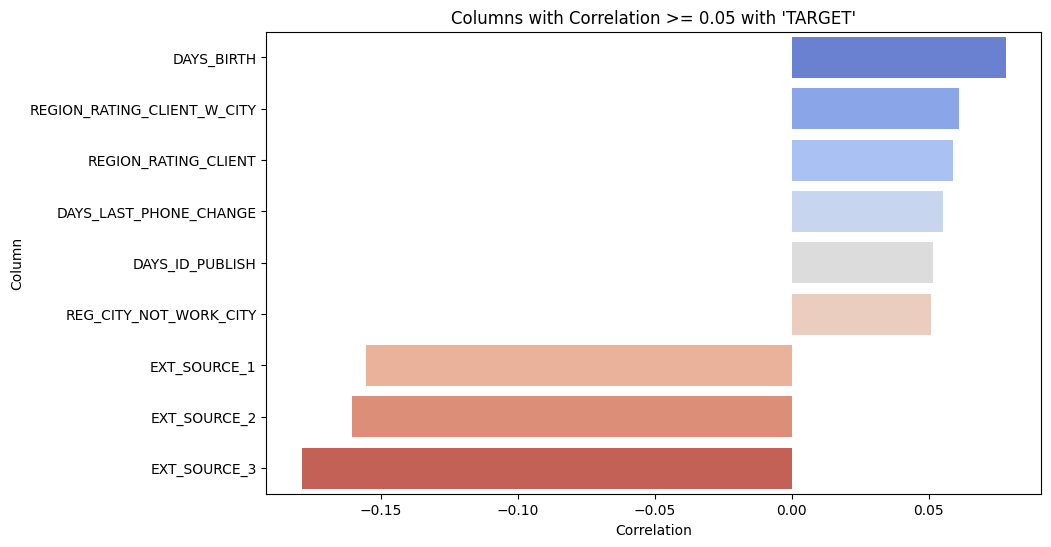

,Column,Correlation
7,DAYS_BIRTH,0.078239
20,REGION_RATING_CLIENT_W_CITY,0.060893
19,REGION_RATING_CLIENT,0.058899
78,DAYS_LAST_PHONE_CHANGE,0.055218
10,DAYS_ID_PUBLISH,0.051457
26,REG_CITY_NOT_WORK_CITY,0.050994
28,EXT_SOURCE_1,-0.155317
29,EXT_SOURCE_2,-0.160472
30,EXT_SOURCE_3,-0.178919


In [ ]:
 correlation_with_value(apl_train, "TARGET", value=0.05)

In [ ]:
def scatter_plot_matrix_most_correlated(df, target_column, threshold=0.5):
    # Check if the target column exists in the DataFrame
    if target_column not in df.columns:
        print(f"Column '{target_column}' does not exist in the DataFrame.")
        return

    # Check if the target column's data type is numeric
    if np.issubdtype(df[target_column].dtype, np.number):
        # Create a new DataFrame with only numeric columns
        numerical_df = df.select_dtypes(include=[np.number])

        # Compute the correlation matrix
        correlation_matrix = numerical_df.corr()

        # Ensure the target column exists in the correlation matrix
        if target_column in correlation_matrix.columns:
            # Compute correlation of each numeric column with the target column
            correlations = {}
            for col in numerical_df.columns:
                if col != target_column:
                    correlations[col] = df[[col, target_column]].corr().iloc[0, 1]

            # Convert correlations dictionary to a DataFrame for better readability
            correlations_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Correlation'])

            # Sort by correlation values and filter by the threshold
            correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)
            most_correlated_cols = correlations_df[abs(correlations_df['Correlation']) >= threshold]['Column'].tolist()

            # Add the target column to the list
            most_correlated_cols.append(target_column)

            # Create the scatter plot matrix (pairplot)
            sns.pairplot(df[most_correlated_cols], diag_kind="kde", palette='coolwarm')
            plt.title(f"Scatter Plot Matrix of Columns Correlated with '{target_column}' (threshold: {threshold})")
            plt.show()

        else:
            print(f"Column '{target_column}' is not present in the correlation matrix.")
    else:
        print(f"Column '{target_column}' is not numeric. Correlation analysis is not applicable.")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

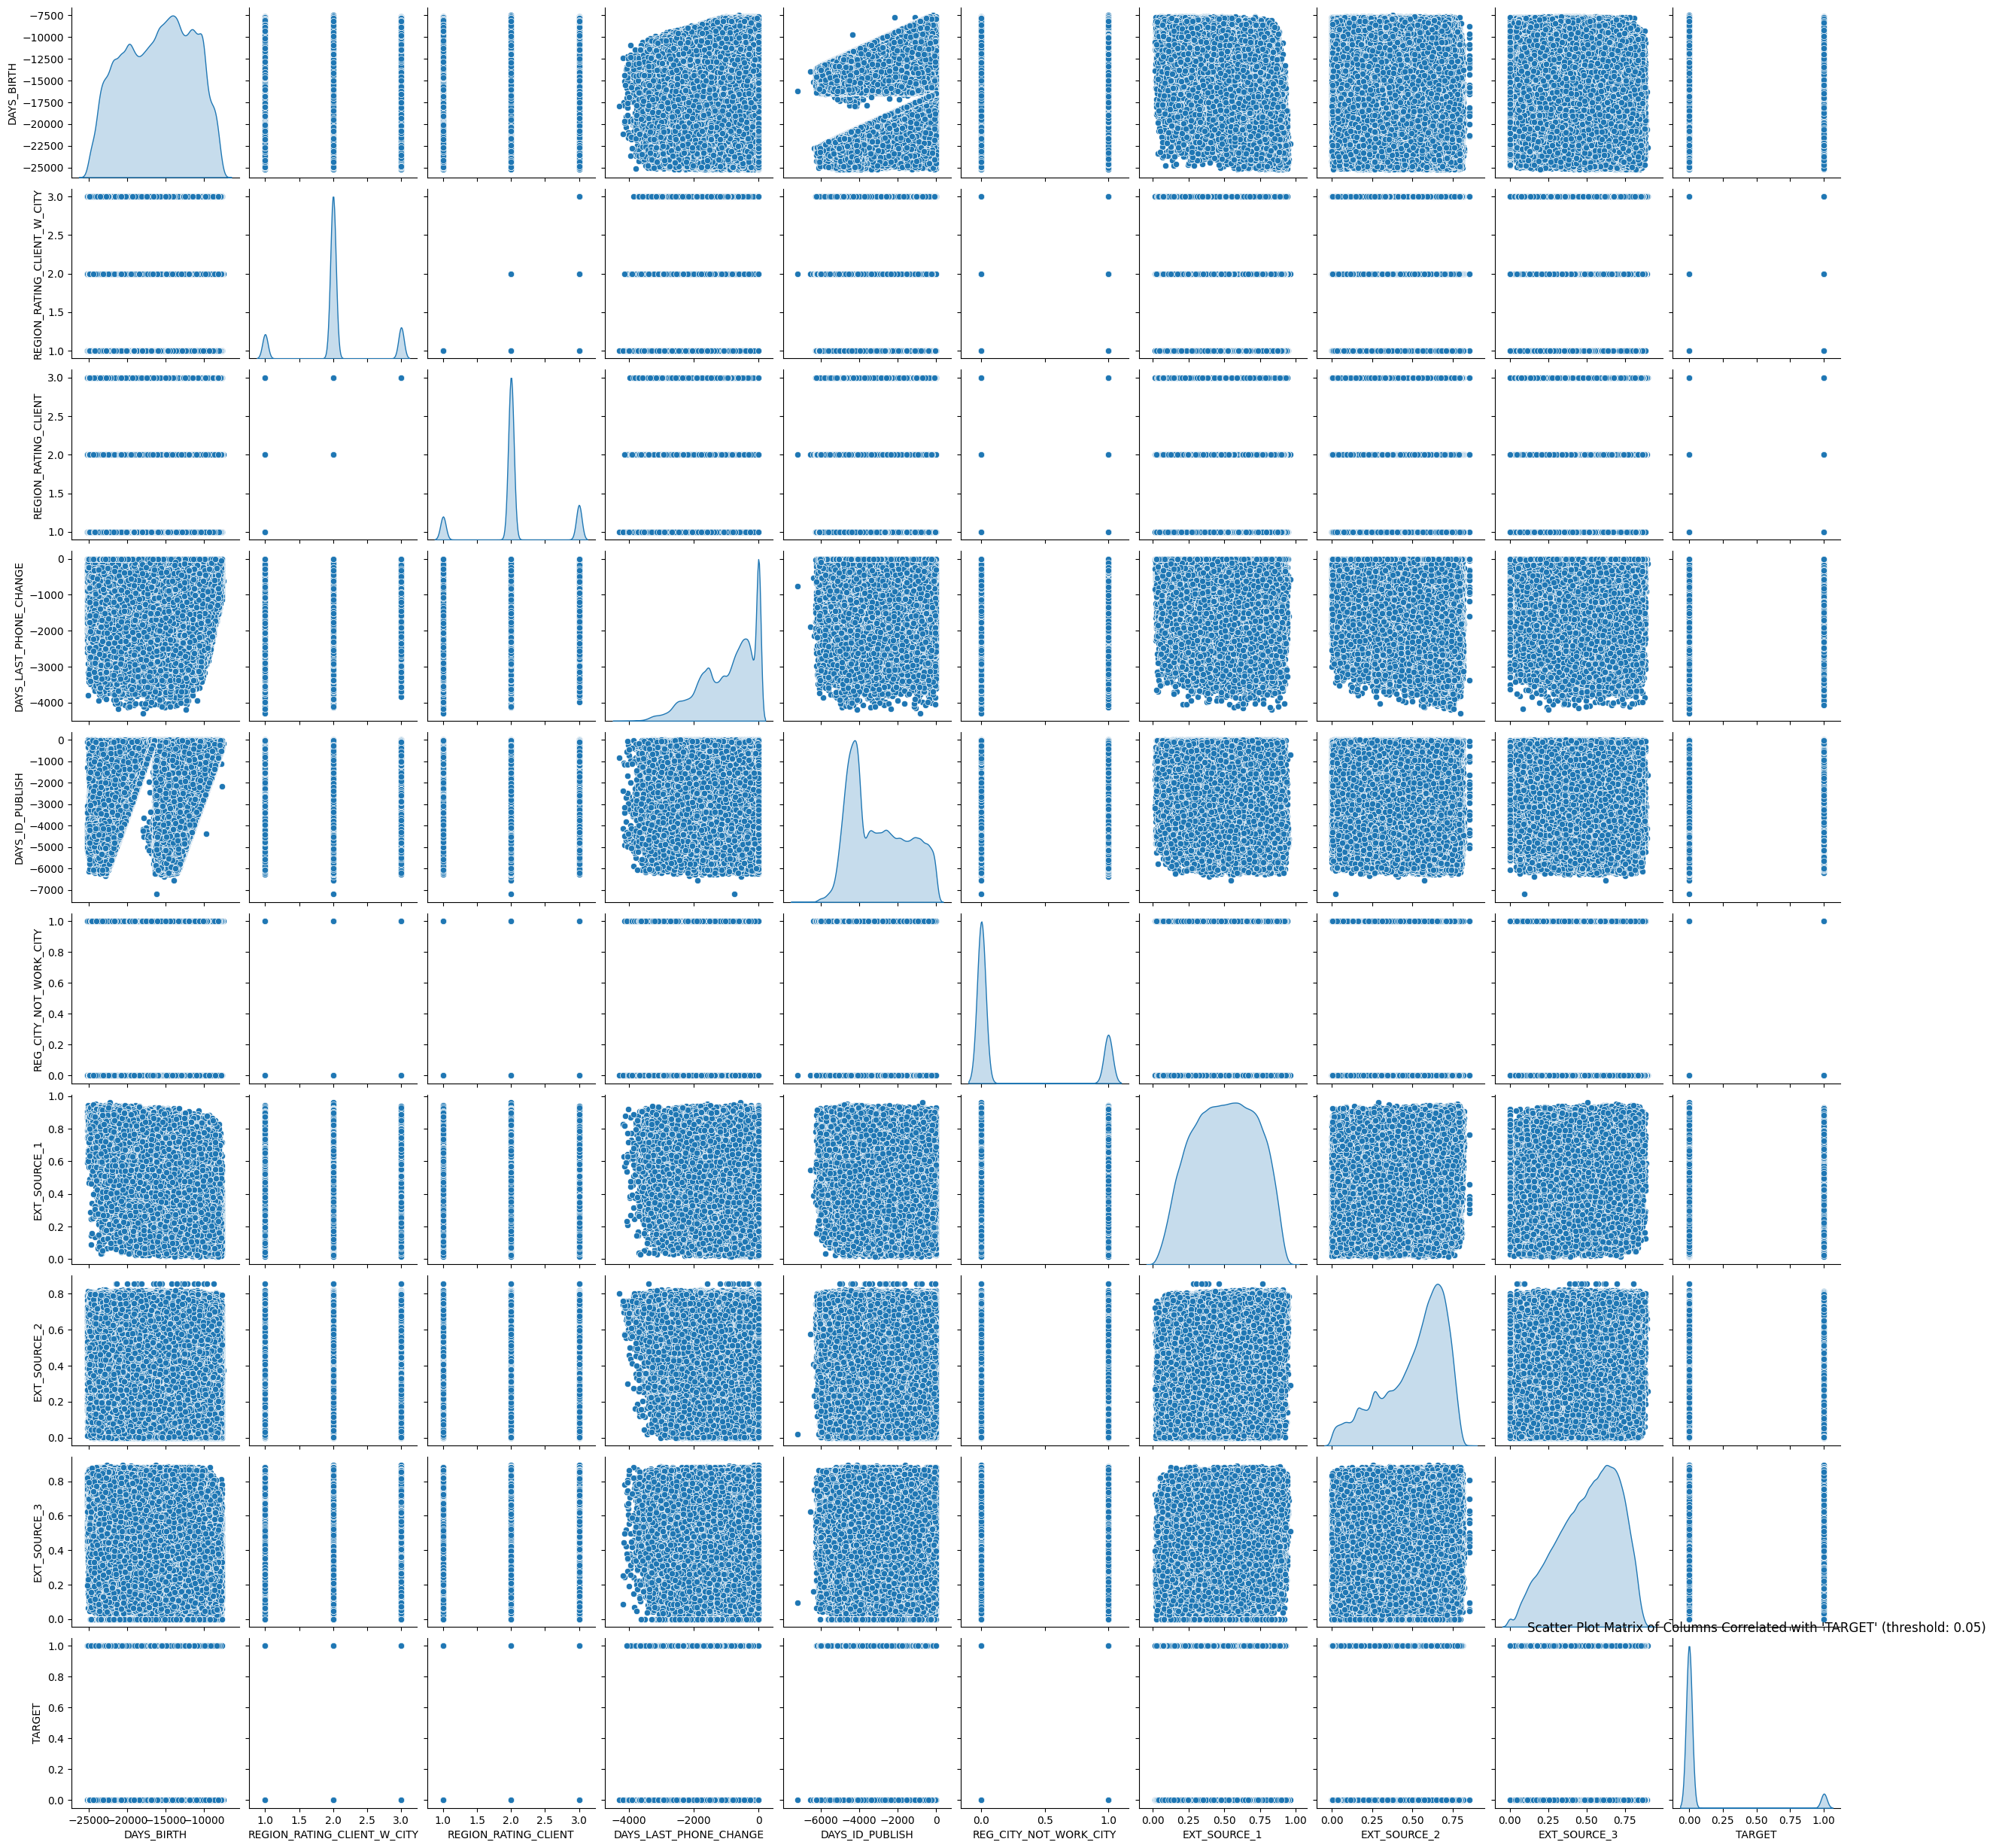

In [ ]:
scatter_plot_matrix_most_correlated(apl_train, "TARGET", threshold=0.05)

In [ ]:
scatter_plot_matrix_most_correlated(apl_train, "TARGET", threshold=0.02)

## Data preprocessing

In [ ]:
def cols_to_drop(df, threshold_1, threshold_2):

    cols_to_drop = []

    # Calculate the percentage of missing values for each column
    missing_count_pct = df.isnull().sum() / len(df) * 100

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the missing value percentage is above the threshold
        if missing_count_pct[col] > threshold_1:
            cols_to_drop.append(col)

        # Check if the column is of object type and has more unique values than the threshold
        if df[col].dtype == 'object' and df[col].nunique() > threshold_2:
            cols_to_drop.append(col)

    return cols_to_drop



In [ ]:
apl_cols_to_drop = cols_to_drop(apl_train, 25, 5)


In [ ]:
apl_cols_to_drop

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [ ]:
def drop_cols(df, drop_coulumns):
  df = df.drop(drop_coulumns, axis = 1)
  return df

In [ ]:
apl_train = drop_cols(apl_train, apl_cols_to_drop)

In [ ]:
apl_test = drop_cols(apl_test, apl_cols_to_drop)

In [ ]:
apl_train.shape

(307511, 66)

In [ ]:
apl_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
apl_test.shape

(48744, 65)

In [ ]:
def aggregate_data(data, id_var, label=None):

    ### SEPARATE FEATURES

    # Display info
    print("- Preparing the dataset...")

    # Find factors (categorical columns)
    data_factors = [f for f in data.columns if data[f].dtype == "object"]

    # Partition subsets
    num_data = data.drop(columns=data_factors)
    fac_data = data[[id_var] + data_factors]

    # Display info
    num_facs = fac_data.shape[1] - 1
    num_nums = num_data.shape[1] - 1
    print(f"- Extracted {num_facs} factors and {num_nums} numerics...")

    ##### AGGREGATION

    # Aggregate numeric data
    if num_nums > 0:
        print("- Aggregating numeric features...")
        num_data = num_data.groupby(id_var).agg(["mean", "std", "min", "max"])
        num_data.columns = ["_".join(col).strip() for col in num_data.columns.values]
        num_data = num_data.sort_index()

    # Aggregate categorical data
    if num_facs > 0:
        print("- Aggregating factor features...")
        fac_data = fac_data.groupby(id_var).agg([
            ("mode", lambda x: x.mode()[0] if not x.mode().empty else None),
            ("unique", lambda x: x.nunique())
        ])
        fac_data.columns = ["_".join(col).strip() for col in fac_data.columns.values]
        fac_data = fac_data.sort_index()

    ##### MERGER

    # Merge numeric and categorical data
    if num_nums > 0 and num_facs > 0:
        agg_data = pd.concat([num_data, fac_data], axis=1)
    elif num_nums > 0:
        agg_data = num_data
    elif num_facs > 0:
        agg_data = fac_data
    else:
        agg_data = pd.DataFrame()

    ##### LAST STEPS

    # Update labels if provided
    if label is not None:
        agg_data.columns = [f"{label}_{col}" for col in agg_data.columns]

    # Display info
    print("- Final dimensions:", agg_data.shape)

    # Return the aggregated dataset
    return agg_data

## Merge train and test tables with rest

## Try to merge Raw tables

# Train dataset

In [ ]:
print(apl_train.shape)
apl_train_merge = apl_train.merge(right = bur.reset_index(), how = "left", on = "SK_ID_CURR")
print(apl_train_merge.shape)
del bur
apl_train_merge = apl_train_merge.merge(right = inst.reset_index(), how = "left", on = "SK_ID_CURR")
print(apl_train_merge.shape)
del inst
apl_train_merge = apl_train_merge.merge(right = pos.reset_index(), how = "left", on = "SK_ID_CURR")
print(apl_train_merge.shape)
del pos
apl_train_merge = apl_train_merge.merge(right = credit.reset_index(), how = "left", on = "SK_ID_CURR")
print(apl_train_merge.shape)


(307511, 122)
(1509345, 139)


In [ ]:
apl_train_enc = apl_train_enc.merge(right=prev.reset_index(), how="left", on="SK_ID_CURR", suffixes=('_train', '_prev'))
print(apl_train_merge.shape)
del prev_enc

## Test dataset

In [ ]:
print(apl_test.shape)
apl_test_merge = apl_test.merge(right = bur.reset_index(), how = "left", on = "SK_ID_CURR")
print(apl_test_merge.shape)
del bur
apl_test_merge = apl_test_merge.merge(right = inst.reset_index(), how = "left", on = "SK_ID_CURR")
print(apl_test_merge.shape)
del inst
apl_test_merge = apl_train_merge.merge(right = pos.reset_index(), how = "left", on = "SK_ID_CURR")
print(apl_train_merge.shape)
del pos
apl_test_merge = apl_train_merge.merge(right = credit.reset_index(), how = "left", on = "SK_ID_CURR")
print(apl_test_merge.shape)

In [ ]:
apl_test_enc = apl_test_enc.merge(right=prev.reset_index(), how="left", on="SK_ID_CURR", suffixes=('_train', '_prev'))
print(apl_test_merge.shape)
del prev_enc

## Download merged dataset and save for future data preprocessing

In [ ]:

apl_train_merge.to_csv("apl_train_merge.csv")
files.download('apl_train_merge.csv')
apl_test_merge.to_csv("apl_test_merge.csv")
files.download('apl_test_merge.csv')